### Scoring evaluation - irrelevant content NOT included

The notebook illustrates the behavior of the scores as inferred by the service trained WITHOUT any irrelevant content.

It is meant to be compared with the variant trained on the irrelevant dataset together with others.

The used service is a result of training in stratified 5-CV splits, thus 1/5 of the data was left out of training.

In [1]:
from sklearn.externals import joblib
from search_service import RelevanceSearchService
import numpy as np
import pandas as pd

In [2]:
from dependencies.scores_tuner import ScoreTuner

In [3]:
service = RelevanceSearchService()
service.load_trained_model("training/trained_service_prod")

2017-08-03 15:21:17,592 : INFO : Loading serialized wrapper model from: training/trained_service_prod
2017-08-03 15:21:17,592 : INFO : Loading trained Doc2Vec model
2017-08-03 15:21:17,593 : INFO : loading Doc2Vec object from training/trained_service_prod/doc2vec.mod
2017-08-03 15:21:17,805 : INFO : loading docvecs recursively from training/trained_service_prod/doc2vec.mod.docvecs.* with mmap=None
2017-08-03 15:21:17,806 : INFO : loading doctag_syn0 from training/trained_service_prod/doc2vec.mod.docvecs.doctag_syn0.npy with mmap=None
2017-08-03 15:21:18,303 : INFO : loading syn1neg from training/trained_service_prod/doc2vec.mod.syn1neg.npy with mmap=None
2017-08-03 15:21:18,694 : INFO : loading syn0 from training/trained_service_prod/doc2vec.mod.syn0.npy with mmap=None
2017-08-03 15:21:19,074 : INFO : setting ignored attribute syn0norm to None
2017-08-03 15:21:19,075 : INFO : setting ignored attribute cum_table to None
2017-08-03 15:21:19,165 : INFO : Loading pickled classifier from tr

In [5]:
original_scores_df = joblib.load("training/original_inferred_scores.dump")
original_scores_df.describe()

,None,amq,bpmsuite,brms,cdk,datagrid,developertoolset,devstudio,eap,fsw,fuse,mobileplatform,openshift,rhel,softwarecollections,webserver
count,4.872200e+04,4.872200e+04,4.872200e+04,4.872200e+04,4.872200e+04,4.872200e+04,4.872200e+04,4.872200e+04,4.872200e+04,4.872200e+04,4.872200e+04,4.872200e+04,4.872200e+04,4.872200e+04,48722.000000,4.872200e+04
mean,1.479477e-01,7.998972e-03,2.127933e-02,1.580305e-02,1.077862e-03,5.485645e-03,2.168935e-04,6.836005e-02,3.678084e-01,6.781634e-03,1.466706e-01,2.046915e-03,6.947018e-02,1.202281e-01,0.000077,1.874779e-02
std,3.446841e-01,4.625455e-02,1.026283e-01,7.644379e-02,1.415555e-02,4.020588e-02,3.559140e-03,2.050593e-01,4.206183e-01,4.534626e-02,3.024137e-01,2.191284e-02,2.239586e-01,3.010371e-01,0.000194,8.141389e-02
min,2.426913e-13,1.423270e-09,1.328238e-09,2.375641e-09,4.264328e-08,7.910501e-10,6.855771e-07,4.188493e-10,3.119012e-09,2.491475e-09,1.324065e-09,4.164445e-08,8.812609e-11,5.913139e-11,0.000001,5.738734e-10
25%,9.398786e-05,1.346436e-04,1.290859e-04,1.139752e-04,5.742673e-05,7.525475e-05,5.777047e-05,3.877934e-04,4.053093e-03,9.477217e-05,7.170889e-04,6.792997e-05,1.417092e-04,1.821272e-05,0.000034,2.266379e-04
50%,4.303510e-04,6.255685e-04,5.861493e-04,8.154267e-04,1.531184e-04,3.815831e-04,1.092197e-04,2.180537e-03,6.625246e-02,3.918162e-04,6.176589e-03,2.338751e-04,9.843814e-04,1.740966e-04,0.000052,1.280394e-03
75%,2.429775e-03,2.405676e-03,2.856986e-03,4.249499e-03,4.126921e-04,1.509849e-03,1.980958e-04,1.299264e-02,8.938779e-01,1.805333e-03,5.782144e-02,7.216714e-04,6.773912e-03,2.314419e-03,0.000086,6.136527e-03
max,9.997483e-01,9.417549e-01,9.877011e-01,9.843612e-01,8.625818e-01,9.727634e-01,5.432264e-01,9.992747e-01,9.997905e-01,9.278629e-01,9.999139e-01,8.927543e-01,9.987339e-01,9.948660e-01,0.025251,9.725906e-01


In [6]:
custom_score_tuner = ScoreTuner()
custom_score_tuner.target_beta_scaling = [0.2, 1.5]
custom_score_tuner.train_categories_thresholds(original_scores_df["y"], original_scores_df[service.model_categories])
custom_score_tuner.cats_original_thresholds
service.score_tuner = custom_score_tuner

2017-08-03 15:27:20,301 : INFO : Categories size: 
eap                    17368
None                    7459
fuse                    7099
rhel                    5990
openshift               3490
devstudio               3297
bpmsuite                1091
webserver                906
brms                     787
amq                      403
fsw                      355
datagrid                 299
mobileplatform           100
cdk                       62
developertoolset          11
softwarecollections        5
Name: y, dtype: int64
2017-08-03 15:27:20,303 : WARNING : Categories f-score betas as scaled by cat sizes: 
eap                    0.191614
None                   0.247519
fuse                   0.251121
rhel                   0.263802
openshift              0.307638
devstudio              0.312595
bpmsuite               0.424974
webserver              0.447437
brms                   0.465294
amq                    0.561632
fsw                    0.582361
datagrid               0.

In [7]:
scores_df = service.score_tuner.tune_all_scores(original_scores_df[service.model_categories])
scores_df["y"] = original_scores_df["y"]

2017-08-03 15:27:31,289 : INFO : Tuning probs of 48722 docs


In [8]:
service.score_tuner.cats_original_thresholds

eap                    0.873613
None                   0.506738
fuse                   0.750639
rhel                   0.855070
openshift              0.670521
devstudio              0.653940
bpmsuite               0.539642
webserver              0.458629
brms                   0.440987
amq                    0.337092
fsw                    0.381972
datagrid               0.357065
mobileplatform         0.228719
cdk                    0.236074
developertoolset       0.999994
softwarecollections    0.999994
dtype: float64

In [9]:
service.score_tuner.target_beta_scaling

[0.2, 1.5]

In [10]:
len(scores_df)

48722

In [11]:
service.score_tuner.precision_recall_for_category(scores_df["y"], scores_df["eap"], "eap", 0.5)

(0.971338799908039, 0.7297904191616766)

In [12]:
service.score_tuner.beta_for_categories_provider(scores_df["y"])["eap"]

2017-08-03 15:27:32,122 : INFO : Categories size: 
eap                    17368
None                    7459
fuse                    7099
rhel                    5990
openshift               3490
devstudio               3297
bpmsuite                1091
webserver                906
brms                     787
amq                      403
fsw                      355
datagrid                 299
mobileplatform           100
cdk                       62
developertoolset          11
softwarecollections        5
Name: y, dtype: int64
2017-08-03 15:27:32,124 : WARNING : Categories f-score betas as scaled by cat sizes: 
eap                    0.191614
None                   0.247519
fuse                   0.251121
rhel                   0.263802
openshift              0.307638
devstudio              0.312595
bpmsuite               0.424974
webserver              0.447437
brms                   0.465294
amq                    0.561632
fsw                    0.582361
datagrid               0.

0.19161431421442737

In [13]:
# true scores distribution for categories: 1. before tuning, 2. after tuning
true_docs_scores_tuned = pd.DataFrame(columns=["cat", "score"])

for cat in set(scores_df.columns)-{"y"}:
    new_scores = scores_df.ix[scores_df["y"]==cat, cat]
    new_cat = [cat]*len(new_scores)
    new_df = pd.DataFrame()
    new_df["score"] = new_scores
    new_df["cat"] = new_cat
    true_docs_scores_tuned = true_docs_scores_tuned.append(new_df)

### Scoring of the categorized documents towards their TRUE category

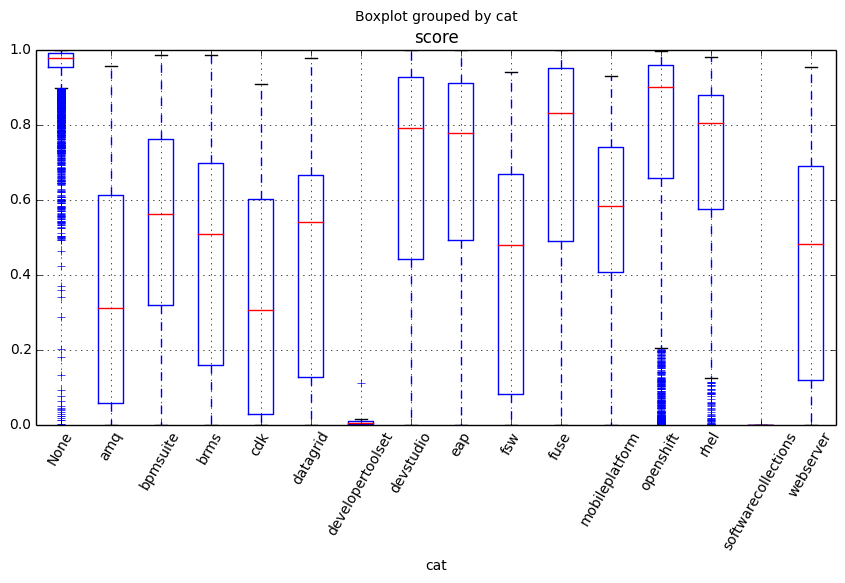

In [14]:
%matplotlib inline
true_docs_scores_tuned.boxplot("score", by="cat", figsize=(10,5), rot=60)

In [15]:
# true scores distribution for categories: 1. before tuning, 2. after tuning
false_docs_scores_tuned = pd.DataFrame(columns=["cat", "score"])

for cat in set(scores_df.columns)-{"y"}:
    new_scores = scores_df.ix[scores_df["y"]!=cat, cat]
    new_cat = [cat]*len(new_scores)
    new_df = pd.DataFrame()
    new_df["score"] = new_scores
    new_df["cat"] = new_cat
    false_docs_scores_tuned = false_docs_scores_tuned.append(new_df)

### Scoring of the categorized documents towards their FALSE categories

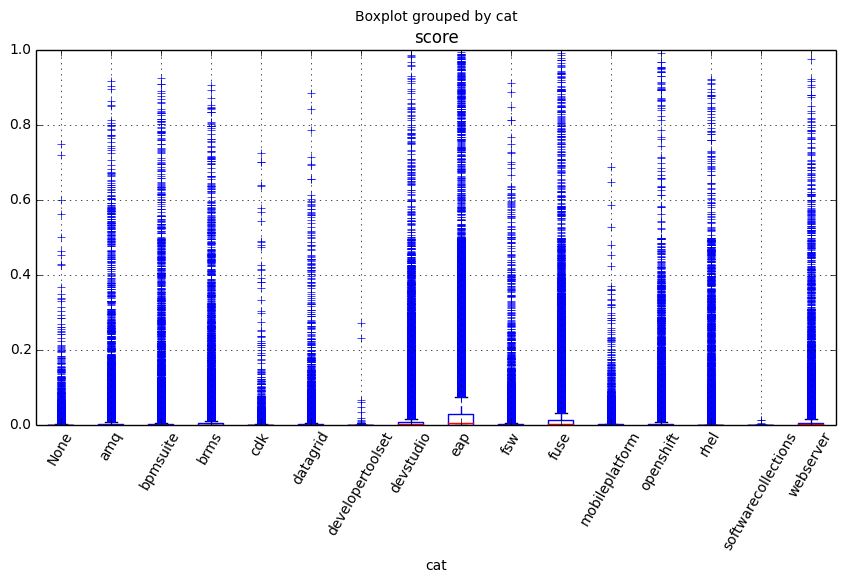

In [16]:
%matplotlib inline
false_docs_scores_tuned.boxplot("score", by="cat", figsize=(10,5), rot=60)

### Average scoring of the documents toward FALSE categories in relation to the content size

In [17]:
false_docs_scores_tuned["score"] = false_docs_scores_tuned["score"].apply(lambda x: float(x))

In [18]:
# false_docs_scores_tuned[false_docs_scores_tuned["cat"] == "none"]["cat"] = "None"

In [19]:
# drops off categories with no content in evaluation set if there are any
false_docs_scores_tuned = false_docs_scores_tuned.dropna(subset=["score"])

In [20]:
# negative mean scores for categories
cat_meta = pd.DataFrame(index=false_docs_scores_tuned["cat"].unique())
cat_meta["mean_score"] = false_docs_scores_tuned.groupby(by="cat").apply(np.mean)
cat_meta["cat_size"] = true_docs_scores_tuned.groupby(by="cat").count()
cat_meta.sort_values(by="cat_size")

,mean_score,cat_size
softwarecollections,0.000038,5
developertoolset,0.000105,11
cdk,0.001592,62
mobileplatform,0.002721,100
datagrid,0.004475,299
fsw,0.005420,355
amq,0.008167,403
brms,0.010241,787
webserver,0.012134,906
bpmsuite,0.008595,1091


### Performance evaluation of the system on original categories

Performance of category is F-score of given category scores with precision/recall weighted by categories selected betas 



In [21]:
taken_categories = set(scores_df.columns) - {"None", "mobileplatform"}
scores_df_no_nans = scores_df.loc[scores_df["y"].isin(taken_categories), list(taken_categories)]
scores_df_filtered = scores_df_no_nans[list(taken_categories-{"y"})].applymap(float)
y_filtered = scores_df_no_nans["y"]

cats_betas = service.score_tuner.beta_for_categories_provider(y_filtered)
categories = pd.Series(scores_df_filtered.columns)

cats_perf = categories.apply(lambda cat: service.score_tuner.f_score_for_category(y_filtered, 
                                                                                  scores_df_filtered[cat], 
                                                                                  cat,
                                                                                  0.5,
                                                                                  cats_betas[cat]))
cats_perf.index = categories
# particular categories performance
cats_perf

2017-08-03 15:28:01,142 : INFO : Categories size: 
eap                    17368
fuse                    7099
rhel                    5990
openshift               3490
devstudio               3297
bpmsuite                1091
webserver                906
brms                     787
amq                      403
fsw                      355
datagrid                 299
cdk                       62
developertoolset          11
softwarecollections        5
Name: y, dtype: int64
2017-08-03 15:28:01,144 : WARNING : Categories f-score betas as scaled by cat sizes: 
eap                    0.193304
fuse                   0.244812
rhel                   0.255788
openshift              0.293733
devstudio              0.298023
bpmsuite               0.395297
webserver              0.414741
brms                   0.430198
amq                    0.513587
fsw                    0.531530
datagrid               0.557091
cdk                    0.890390
developertoolset       1.761261
softwarecollections

softwarecollections    0.000000
brms                   0.706213
bpmsuite               0.779660
devstudio              0.927303
cdk                    0.589505
datagrid               0.754431
webserver              0.715666
fuse                   0.947119
rhel                   0.968810
fsw                    0.686296
amq                    0.532896
eap                    0.960245
developertoolset       0.000000
openshift              0.961854
dtype: float64

The categories performance is very similar to the service trained also on irrelevant content.

## Overall performance on relevant categories' dataset as defined in ScoreTuner:

Performance is also based on the selected beta for categories, so it really **depends on the target beta scaling**

## Negative samples scoring

We evaluate the scoring towards categories on a content which is obviously not relevant to any of the categories
Here we attempt to reach the lowest possible score, optimally balanced amongst the categories.

We take the trained score service from the last split of the big dijunctive evaluation - service trained on 4/5 of content.

The service uses as unrelevant content the movie reviews dataset (25000 reviews) from IMDB.

Here, for evaluation on distinct negative sample we use:

1) Set of 5000 political tweets from twitter.

2) Set of 20000 economical news articles.

The category of evaluation dataset and its random or latent relevance towards the training categories' content might cause a certain level of bias to the scoring.

In [22]:
service.score_tuner.evaluate_trained(y_filtered, scores_df_filtered)

2017-08-03 15:28:01,378 : INFO : Categories size: 
eap                    17368
fuse                    7099
rhel                    5990
openshift               3490
devstudio               3297
bpmsuite                1091
webserver                906
brms                     787
amq                      403
fsw                      355
datagrid                 299
cdk                       62
developertoolset          11
softwarecollections        5
Name: y, dtype: int64
2017-08-03 15:28:01,380 : WARNING : Categories f-score betas as scaled by cat sizes: 
eap                    0.193304
fuse                   0.244812
rhel                   0.255788
openshift              0.293733
devstudio              0.298023
bpmsuite               0.395297
webserver              0.414741
brms                   0.430198
amq                    0.513587
fsw                    0.531530
datagrid               0.557091
cdk                    0.890390
developertoolset       1.761261
softwarecollections

0.58310968150240372

In [23]:
from search_service import RelevanceSearchService
from dependencies.scores_tuner import ScoreTuner

In [24]:
eval_service = service

In [25]:
eval_service.score_tuner.cats_original_thresholds

eap                    0.873613
None                   0.506738
fuse                   0.750639
rhel                   0.855070
openshift              0.670521
devstudio              0.653940
bpmsuite               0.539642
webserver              0.458629
brms                   0.440987
amq                    0.337092
fsw                    0.381972
datagrid               0.357065
mobileplatform         0.228719
cdk                    0.236074
developertoolset       0.999994
softwarecollections    0.999994
dtype: float64

### Political tweets dataset

In [26]:
neg_samples_csv = pd.read_csv("../../data/content/experimental/eval_set/Political-media-DFE.csv")
neg_samples_csv["text"].head()

0    RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1    VIDEO - #Obamacare:  Full of Higher Costs and ...
2    Please join me today in remembering our fallen...
3    RT @SenatorLeahy: 1st step toward Senate debat...
4    .@amazon delivery #drones show need to update ...
Name: text, dtype: object

In [27]:
def take_first_n_words(text, n=5):
    n_words = text.split()[:n]
    return reduce(lambda w_one, w_two: "%s %s" % (w_one, w_two), n_words)

def replace_non_ascii(str):
    return ''.join([i if ord(i) < 128 else ' ' for i in str])

In [28]:
neg_samples_df = pd.DataFrame(columns=["id", "doc_header", "doc_content"])
# TODO: set limit here if needed
neg_samples_df[["id", "doc_content"]] = neg_samples_csv[["_unit_id", "text"]]
# set first 5 words as document headers
neg_samples_df["doc_header"] = neg_samples_df["doc_content"].apply(lambda content: take_first_n_words(content, n=5))
neg_samples_df["doc_content"] = neg_samples_df["doc_content"].apply(replace_non_ascii)
neg_samples_df["doc_header"] = neg_samples_df["doc_header"].apply(replace_non_ascii)
neg_samples_df.head()

,id,doc_header,doc_content
0,766192484,RT @nowthisnews: Rep. Trey Radel,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,VIDEO - #Obamacare: Full of,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,Please join me today in,Please join me today in remembering our fallen...
3,766192487,RT @SenatorLeahy: 1st step toward,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,.@amazon delivery #drones show need,.@amazon delivery #drones show need to update ...


In [29]:
neg_samples_scores = eval_service.score_docs_bulk(neg_samples_df["id"], 
                                                  neg_samples_df["doc_header"], 
                                                  neg_samples_df["doc_content"])

2017-08-03 15:28:01,784 : INFO : Requested docs: [766192484 766192485 766192486 ..., 766197484 766197485 766197486] for scoring
2017-08-03 15:28:01,794 : INFO : Docs [766192484 766192485 766192486 ..., 766197484 766197485 766197486]: preprocessing
2017-08-03 15:28:02,630 : INFO : Initializing 5000 CategorizedDocuments
2017-08-03 15:28:02,926 : INFO : Docs [766192484 766192485 766192486 ..., 766197484 766197485 766197486]: vectorizing using trained Doc2Vec model in 10 iterations
2017-08-03 15:28:02,935 : INFO : Initialized 5000 headers of 5000 for vectorization
2017-08-03 15:28:02,935 : INFO : Inferring vectors of 5000 documents in 0/10 cycle
2017-08-03 15:28:10,738 : INFO : Inferring vectors of 5000 headers in 0/10 cycle
2017-08-03 15:28:12,649 : INFO : Inferring vectors of 5000 documents in 1/10 cycle
2017-08-03 15:28:20,596 : INFO : Inferring vectors of 5000 headers in 1/10 cycle
2017-08-03 15:28:22,456 : INFO : Inferring vectors of 5000 documents in 2/10 cycle
2017-08-03 15:28:30,24

In [30]:
%matplotlib inline

scores_norm_flattened = pd.DataFrame(columns=["cat", "score"])

for cat in eval_service.vector_classifier.classes_:
    new_scores = neg_samples_scores[cat]
    new_cat = [cat]*len(new_scores)
    new_df = pd.DataFrame()
    new_df["score"] = new_scores
    new_df["cat"] = new_cat
    scores_norm_flattened = scores_norm_flattened.append(new_df)

### Scoring of unrelevant content - political tweets - towards training categories

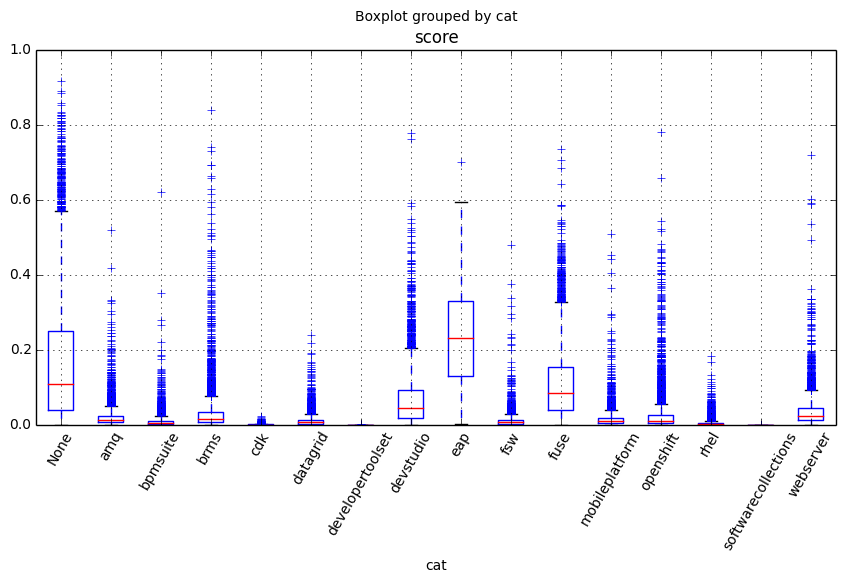

In [31]:
scores_norm_flattened.boxplot("score", by="cat", figsize=(10,5), rot=60)

In [32]:
# see that the devstudio scoring is incorrectly normalized upwards, 
# whereas the fuse and eap are learnt to correctly normalize down

eval_service.score_tuner.cats_original_thresholds

eap                    0.873613
None                   0.506738
fuse                   0.750639
rhel                   0.855070
openshift              0.670521
devstudio              0.653940
bpmsuite               0.539642
webserver              0.458629
brms                   0.440987
amq                    0.337092
fsw                    0.381972
datagrid               0.357065
mobileplatform         0.228719
cdk                    0.236074
developertoolset       0.999994
softwarecollections    0.999994
dtype: float64

This is to be compared with the service trained on purely-relevant categories' content. We attempt to push the scores for categories as down as possible, and to evenly distribute the scores towards relevant categories.

### Economic News Articles dataset

In [33]:
neg_samples_csv = pd.read_csv("../../data/content/experimental/eval_set/Full-Economic-News-DFE-839861.csv")
# Cut the first 10 000 samples
# neg_samples_csv = neg_samples_csv.iloc[:10000]

In [34]:
neg_samples_csv.columns

Index([u'_unit_id', u'_golden', u'_unit_state', u'_trusted_judgments',
       u'_last_judgment_at', u'positivity', u'positivity:confidence',
       u'relevance', u'relevance:confidence', u'articleid', u'date',
       u'headline', u'positivity_gold', u'relevance_gold', u'text'],
      dtype='object')

In [35]:
neg_samples_df = pd.DataFrame(columns=["id", "doc_header", "doc_content"])
# TODO: set limit here if needed
neg_samples_df[["id", "doc_header", "doc_content"]] = neg_samples_csv[["_unit_id", "headline", "text"]]
# neg_samples_df["doc_header"] = neg_samples_df["doc_content"].apply(lambda content: take_first_n_words(content, n=5))
neg_samples_df["doc_content"] = neg_samples_df["doc_content"].apply(replace_non_ascii)
neg_samples_df["doc_header"] = neg_samples_df["doc_header"].apply(replace_non_ascii)
neg_samples_df.head()

,id,doc_header,doc_content
0,842613455,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...
1,842613456,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...
2,842613457,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...
3,842613458,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...
4,842613459,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...


In [36]:
neg_samples_scores2 = eval_service.score_docs_bulk(neg_samples_df["id"], 
                                                  neg_samples_df["doc_header"], 
                                                  neg_samples_df["doc_content"])

2017-08-03 15:29:43,293 : INFO : Requested docs: [842613455 842613456 842613457 ..., 830985634 830985635 830985636] for scoring
2017-08-03 15:29:43,295 : INFO : Docs [842613455 842613456 842613457 ..., 830985634 830985635 830985636]: preprocessing
2017-08-03 15:29:48,271 : INFO : Initializing 8000 CategorizedDocuments
2017-08-03 15:29:48,732 : INFO : Docs [842613455 842613456 842613457 ..., 830985634 830985635 830985636]: vectorizing using trained Doc2Vec model in 10 iterations
2017-08-03 15:29:48,744 : INFO : Initialized 8000 headers of 8000 for vectorization
2017-08-03 15:29:48,745 : INFO : Inferring vectors of 8000 documents in 0/10 cycle
2017-08-03 15:31:11,708 : INFO : Inferring vectors of 8000 headers in 0/10 cycle
2017-08-03 15:31:18,487 : INFO : Inferring vectors of 8000 documents in 1/10 cycle
2017-08-03 15:32:41,382 : INFO : Inferring vectors of 8000 headers in 1/10 cycle
2017-08-03 15:32:48,129 : INFO : Inferring vectors of 8000 documents in 2/10 cycle
2017-08-03 15:34:11,29

In [37]:
%matplotlib inline

scores_norm_flattened2 = pd.DataFrame(columns=["cat", "score"])

for cat in eval_service.vector_classifier.classes_:
    new_scores = neg_samples_scores2[cat]
    new_cat = [cat]*len(new_scores)
    new_df = pd.DataFrame()
    new_df["score"] = new_scores
    new_df["cat"] = new_cat
    scores_norm_flattened2 = scores_norm_flattened2.append(new_df)

### Scoring of unrelevant content - Economic News Articles - towards training categories

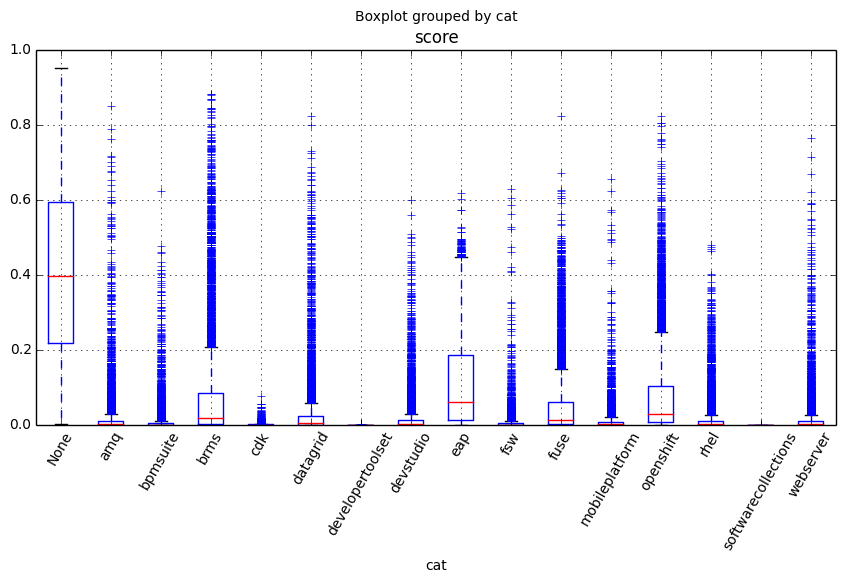

In [38]:
scores_norm_flattened2.boxplot("score", by="cat", figsize=(10,5), rot=60)

### Stackoverflow questions (technical) dataset

In [39]:
import random

so_questions = pd.read_csv("../../data/content/experimental/SO_Questions.csv")
so_questions = so_questions.loc[random.sample(so_questions.index, 10000)]

so_questions.columns

Index([u'Id', u'OwnerUserId', u'CreationDate', u'ClosedDate', u'Score',
       u'Title', u'Body'],
      dtype='object')

In [40]:
neg_samples_df = pd.DataFrame(columns=["id", "doc_header", "doc_content"])
# TODO: set limit here if needed
neg_samples_df[["id", "doc_header", "doc_content"]] = so_questions[["Id", "Title", "Body"]]
# neg_samples_df["doc_header"] = neg_samples_df["doc_content"].apply(lambda content: take_first_n_words(content, n=5))
neg_samples_df["doc_content"] = neg_samples_df["doc_content"].apply(replace_non_ascii)
neg_samples_df["doc_header"] = neg_samples_df["doc_header"].apply(replace_non_ascii)
neg_samples_df.head()

,id,doc_header,doc_content
469574,16426610,Replacing HTML tags with text attributes,<p>I'm getting data from a web service and the...
696652,23758540,Laravel - configure private github repositery ...,<p>I'm trying to configure a private repositor...
341076,12237530,Display Specific Amount of Tabs with Viewpager,<p>I am using a ViewPager to swipe between 4 t...
1204229,38610940,Firefox ignoring CORS method,<p>I'm implementing a web service with CORS su...
355437,12706660,Xcode 4.5 - C programming - built in console w...,"<p>As I typed that title, it became more and m..."


In [41]:
neg_samples_scores3 = service.score_docs_bulk(neg_samples_df["id"], 
                                              neg_samples_df["doc_header"], 
                                              neg_samples_df["doc_content"])

2017-08-03 15:45:05,281 : INFO : Requested docs: [16426610 23758540 12237530 ..., 14228060 39751920  7399640] for scoring
2017-08-03 15:45:05,287 : INFO : Docs [16426610 23758540 12237530 ..., 14228060 39751920  7399640]: preprocessing
2017-08-03 15:45:15,159 : INFO : Initializing 10000 CategorizedDocuments
2017-08-03 15:45:15,760 : INFO : Docs [16426610 23758540 12237530 ..., 14228060 39751920  7399640]: vectorizing using trained Doc2Vec model in 10 iterations
2017-08-03 15:45:15,774 : INFO : Initialized 10000 headers of 10000 for vectorization
2017-08-03 15:45:15,775 : INFO : Inferring vectors of 10000 documents in 0/10 cycle
2017-08-03 15:46:12,945 : INFO : Inferring vectors of 10000 headers in 0/10 cycle
2017-08-03 15:46:20,447 : INFO : Inferring vectors of 10000 documents in 1/10 cycle
2017-08-03 15:47:20,691 : INFO : Inferring vectors of 10000 headers in 1/10 cycle
2017-08-03 15:47:27,536 : INFO : Inferring vectors of 10000 documents in 2/10 cycle
2017-08-03 15:48:24,160 : INFO :

In [42]:
%matplotlib inline

scores_norm_flattened3 = pd.DataFrame(columns=["cat", "score"])

for cat in eval_service.vector_classifier.classes_:
    new_scores = neg_samples_scores3[cat]
    new_cat = [cat]*len(new_scores)
    new_df = pd.DataFrame()
    new_df["score"] = new_scores
    new_df["cat"] = new_cat
    scores_norm_flattened3 = scores_norm_flattened3.append(new_df)

### Scoring of unrelevant content - stackoverflow questions (technical) - towards training categories

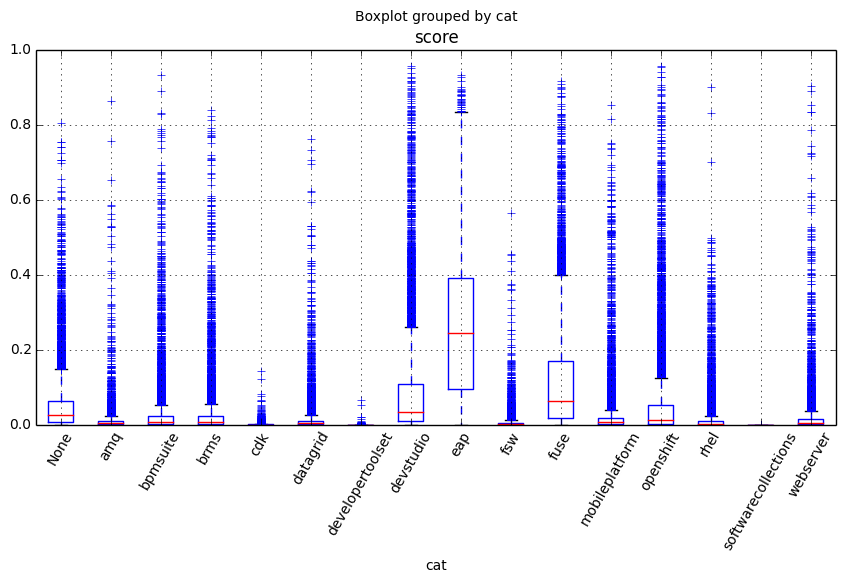

In [43]:
scores_norm_flattened3.boxplot("score", by="cat", figsize=(10,5), rot=60)

## Errors on irrelevants' scoring

In [44]:
scores_wout_none = neg_samples_scores2[neg_samples_scores2.columns[neg_samples_scores2.columns != "None"]]
all_docs = len(scores_wout_none)

### Error (True negatives / all) ratio of irrelevant content

Estimates how many irrelevant results are retrieved from the given irrelevant data set

Note that the document cen be retrieved for more than one category

In [45]:
scores_wout_none = neg_samples_scores2[neg_samples_scores2.columns[neg_samples_scores2.columns != "None"]]
positives = np.sum((scores_wout_none >= 0.5).values)

positives/float(all_docs)

0.060374999999999998

### Errorously retrieved documents

Estimates how many of the given irrelevant documents will be retrieved for at least one category

Suggests whether the irrelevant document is usually retrieved for only one, or multiple categories

In [46]:
once_retrieved_docs = np.sum(scores_wout_none.apply(lambda doc_scores: np.any(doc_scores >= 0.5), axis=1).values)
once_retrieved_docs / float(all_docs)

0.060249999999999998

In [47]:
# Error ratio for categories
cats_errors = pd.Series(scores_wout_none.columns, index=scores_wout_none.columns)
cats_errors = cats_errors.apply(lambda cat: np.sum((scores_wout_none[cat]>=0.5).values) / float(len(scores_wout_none)))

cats_errors.sort_values()

cdk                    0.000000
developertoolset       0.000000
rhel                   0.000000
softwarecollections    0.000000
bpmsuite               0.000125
devstudio              0.000500
fsw                    0.000750
mobileplatform         0.000875
eap                    0.001000
fuse                   0.001750
webserver              0.001875
amq                    0.004125
datagrid               0.007125
openshift              0.009750
brms                   0.032500
dtype: float64

## Results

### Comparison with service trained also on irrelevant content

The comparison with the service trained also on irrelevant content shows very little difference to this one.

We see that for the later two irrelevant datasets, the use of None training category has moved the eap and fuse (two biggest cats) the correct way and the devstudio (highest-scored cat) remain in very similar range. 

There might be a specific reason (perhaps insufficient preprocessing) that avoids the enhancement to properly work for **tweets** (containing distinct word composition and marks like @, #)

The overall performance of the system however was decreased by using the irrelevant dataset by appx. 1.5%.

#### Manual scoring of stackoverflow questions

We've tested the service using the REST interface on several **stackoverflow** questions.
By common observation, the results suggest the preference for using the service **without** irrelevant training content - it inclines to more often corectly boost the score for the correct category, eventhough it does not always score the most relevant category the highest.

The observation further suggests that the problem of unbalanced scoring relative to category size was resolved by implementing Score Tuner, however there is still visible unbalance towards categories. The **devstudio** is often unreasonably preferred over others.

### Comparison of scoring the two irrelevant datasets

The score distribution among the two irrelevant datasets shows almost exact match on mean scores for categories. The only differed category is Openshift whose mean overgrew both fuse and eap.

The comparison of the two graphs stably confirms the defirmation of scoring in favor of devstudio and perhaps fuse cat for this version of service.

**This deformation does not occur, or does occur significantly less for model including None category in training data set.**
